In [1]:

from geo_utils import *

# Download the BindingDB dataset from https://www.bindingdb.org/bind/chemsearch/marvin/BindingDB_All_202411.tsv.zip
# and save it to the data folder

# Load the dataset and save it as a pickle file
df = load_data()
df.head()

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (SwissProt) Recommended Name of Target Chain.12,UniProt (SwissProt) Entry Name of Target Chain.12,UniProt (SwissProt) Primary ID of Target Chain.12,UniProt (SwissProt) Secondary ID(s) of Target Chain.12,UniProt (SwissProt) Alternative ID(s) of Target Chain.12,UniProt (TrEMBL) Submitted Name of Target Chain.12,UniProt (TrEMBL) Entry Name of Target Chain.12,UniProt (TrEMBL) Primary ID of Target Chain.12,UniProt (TrEMBL) Secondary ID(s) of Target Chain.12,UniProt (TrEMBL) Alternative ID(s) of Target Chain.12
0,1,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,InChI=1S/C31H42N2O7/c34-27(35)17-9-3-11-19-32-...,XGEGDSLAQZJGCW-HHGOQMMWSA-N,608734,"6-[(4R,5S,6S,7R)-4,7-dibenzyl-3-(5-carboxypent...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,InChI=1S/C31H34N6O3/c38-29-27(17-23-9-3-1-4-10...,UZLMEAPBHYEHAC-UNTBESQGSA-N,22,"(4R,5S,6S,7R)-4,7-dibenzyl-5,6-dihydroxy-1,3-b...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,InChI=1S/C29H34N4O3/c34-27-25(16-21-8-3-1-4-9-...,HYNYUFZPPJMPOB-UTWJFGBXSA-N,23,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.41,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,InChI=1S/C29H40N2O4/c32-18-10-2-1-9-17-30-25(1...,YXVAZXDWVZTGGD-VIJSPRBVSA-N,24,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,InChI=1S/C28H38N2O4/c31-17-9-3-8-16-29-24(18-2...,WWTSWTPNILRSJX-XDZXDJIYSA-N,25,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.shape

(2927364, 194)

In [3]:
df.columns

Index(['BindingDB Reactant_set_id', 'Ligand SMILES', 'Ligand InChI',
       'Ligand InChI Key', 'BindingDB MonomerID', 'BindingDB Ligand Name',
       'Target Name',
       'Target Source Organism According to Curator or DataSource', 'Ki (nM)',
       'IC50 (nM)',
       ...
       'UniProt (SwissProt) Recommended Name of Target Chain.12',
       'UniProt (SwissProt) Entry Name of Target Chain.12',
       'UniProt (SwissProt) Primary ID of Target Chain.12',
       'UniProt (SwissProt) Secondary ID(s) of Target Chain.12',
       'UniProt (SwissProt) Alternative ID(s) of Target Chain.12',
       'UniProt (TrEMBL) Submitted Name of Target Chain.12',
       'UniProt (TrEMBL) Entry Name of Target Chain.12',
       'UniProt (TrEMBL) Primary ID of Target Chain.12',
       'UniProt (TrEMBL) Secondary ID(s) of Target Chain.12',
       'UniProt (TrEMBL) Alternative ID(s) of Target Chain.12'],
      dtype='object', length=194)

In [4]:
df['Institution'].value_counts()

Institution
TBA                                                                                             64310
Ambit Biosciences                                                                               50025
Pfizer Inc                                                                                      46003
Janssen Pharmaceutica NV                                                                        44166
Merck Research Laboratories                                                                     43602
                                                                                                ...  
BenevolentBio                                                                                       1
National Institute for Science and Technology on Innovation on Neglected Diseases (INCT/IDN)        1
Prince of Songkla University                                                                        1
Cambridge Crystallographic Data Centre                                

#EXAMPLE usage of the google api to get the location of an institution

In [5]:
geocode_result = gmaps.geocode("University of Texas-Arlington")
geocode_result

[{'address_components': [{'long_name': '701',
    'short_name': '701',
    'types': ['street_number']},
   {'long_name': 'South Nedderman Drive',
    'short_name': 'S Nedderman Dr',
    'types': ['route']},
   {'long_name': 'Central Arlington',
    'short_name': 'Central Arlington',
    'types': ['neighborhood', 'political']},
   {'long_name': 'Arlington',
    'short_name': 'Arlington',
    'types': ['locality', 'political']},
   {'long_name': 'Tarrant County',
    'short_name': 'Tarrant County',
    'types': ['administrative_area_level_2', 'political']},
   {'long_name': 'Texas',
    'short_name': 'TX',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': 'United States',
    'short_name': 'US',
    'types': ['country', 'political']},
   {'long_name': '76019', 'short_name': '76019', 'types': ['postal_code']}],
  'formatted_address': '701 S Nedderman Dr, Arlington, TX 76019, USA',
  'geometry': {'location': {'lat': 32.7292117, 'lng': -97.11519709999999},
   'loc

In [6]:
df['Institution'].value_counts()
db = df['Institution'].value_counts()
db = db.reset_index()
db.columns = ['Institution', 'Count']
db.head()

,Institution,Count
0,TBA,64310
1,Ambit Biosciences,50025
2,Pfizer Inc,46003
3,Janssen Pharmaceutica NV,44166
4,Merck Research Laboratories,43602


This cell is commented out because it calls a paid API


In [7]:

    
    

location = {}
full_location = {}
"""
for institution in db['Institution']:
   try:
        full_location[institution] = get_geocode(institution)
        location[institution] = location[institution][0]['geometry']['location']
    except:
        print(institution)
        pass
pickle.dump(location,open('../../data/location.pkl','wb'))
pickle.dump(full_location,open('../../data/full_location.pkl','wb'))
"""


"\nfor institution in db['Institution']:\n   try:\n        full_location[institution] = get_geocode(institution)\n        location[institution] = location[institution][0]['geometry']['location']\n    except:\n        print(institution)\n        pass\npickle.dump(location,open('../../data/location.pkl','wb'))\npickle.dump(full_location,open('../../data/full_location.pkl','wb'))\n"

In [8]:
located = get_cached_locations(db)

In [9]:

db 


,Institution,Count,Lat,Long
0,TBA,64310,0.000000,0.000000
1,Ambit Biosciences,50025,0.000000,0.000000
2,Pfizer Inc,46003,0.000000,0.000000
3,Janssen Pharmaceutica NV,44166,0.000000,0.000000
4,Merck Research Laboratories,43602,0.000000,0.000000
...,...,...,...,...
8573,BenevolentBio,1,0.000000,0.000000
8574,National Institute for Science and Technology ...,1,0.000000,0.000000
8575,Prince of Songkla University,1,7.006945,100.500715
8576,Cambridge Crystallographic Data Centre,1,52.197651,0.126589


The following map is a visual representation of the location of the institutions that contributed to the dataset. The heatmap shows the number of contributions per location.

In [10]:
get_map(located)

In [11]:
full_locations = pickle.load(open('../data/full_institution_locations.pkl', 'rb'))
full_locations['University of Texas-Arlington']

[{'address_components': [{'long_name': '701',
    'short_name': '701',
    'types': ['street_number']},
   {'long_name': 'South Nedderman Drive',
    'short_name': 'S Nedderman Dr',
    'types': ['route']},
   {'long_name': 'Central Arlington',
    'short_name': 'Central Arlington',
    'types': ['neighborhood', 'political']},
   {'long_name': 'Arlington',
    'short_name': 'Arlington',
    'types': ['locality', 'political']},
   {'long_name': 'Tarrant County',
    'short_name': 'Tarrant County',
    'types': ['administrative_area_level_2', 'political']},
   {'long_name': 'Texas',
    'short_name': 'TX',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': 'United States',
    'short_name': 'US',
    'types': ['country', 'political']},
   {'long_name': '76019', 'short_name': '76019', 'types': ['postal_code']}],
  'formatted_address': '701 S Nedderman Dr, Arlington, TX 76019, USA',
  'geometry': {'location': {'lat': 32.7292117, 'lng': -97.11519709999999},
   'loc

In [ ]:
#top countries by institution counts 
dx = db.copy()
countries ={}
for k,v in full_locations.items():
        components = v[0]['address_components']
        country = next((component['long_name'] for component in components if 'country' in component['types']), 'Unknown')
        countries[k] = country
        
dx['Country'] = dx['Institution'].map(countries)

In [13]:
dx['Country'].value_counts().head(10)
dx = dx[dx['Country'] != 'Unknown']



<Axes: xlabel='Country'>

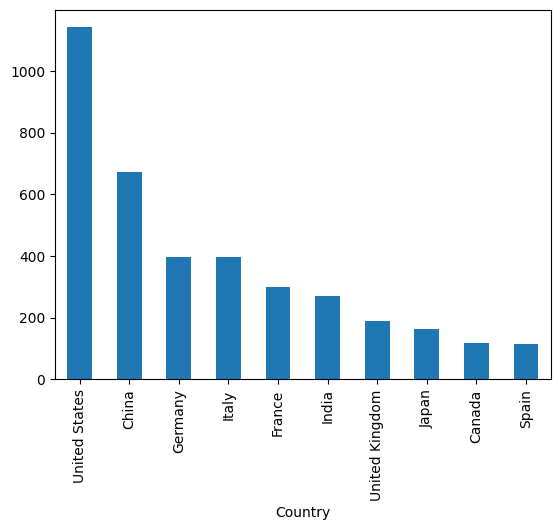

In [14]:
dx['Country'].value_counts().head(10).plot(kind='bar')
#make a scientific plot of the top 10 countries with the most institutions


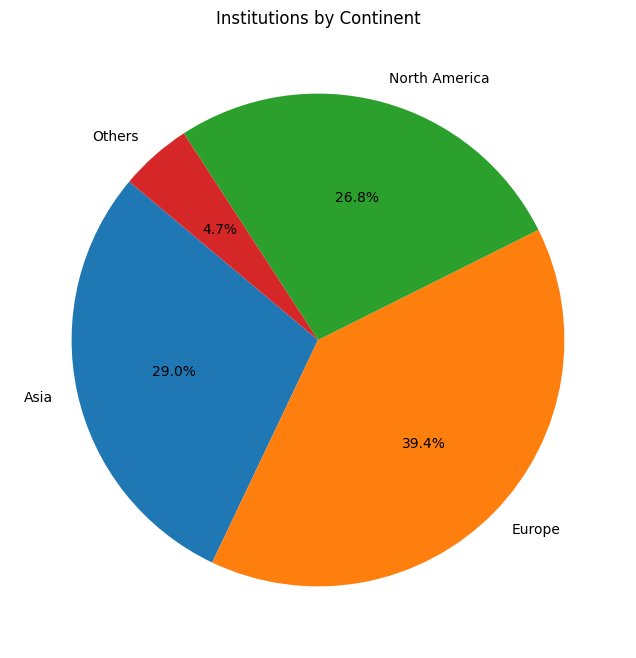

In [ ]:
#pie chart of top contributions per continent
import continents
dx['Continent'] = dx['Country'].map(continents.get_continent)
dy = dx[dx['Continent'] != 'Unknown']

#pickle.dump(dy,open('../data/institution_continent.pkl','wb'))
# Pie chart for number of institutions by continent, grouping those with < 5% as "Others"
continent_institutions = dy.groupby('Continent')['Institution'].count()
total_institutions = continent_institutions.sum()
continent_institutions = continent_institutions[continent_institutions >= 0.05 * total_institutions]
continent_institutions['Others'] = total_institutions - continent_institutions.sum()

plt.figure(figsize=(8, 8))
plt.pie(continent_institutions, labels=continent_institutions.index, autopct='%1.1f%%', startangle=140)
plt.title('Institutions by Continent')
plt.show()




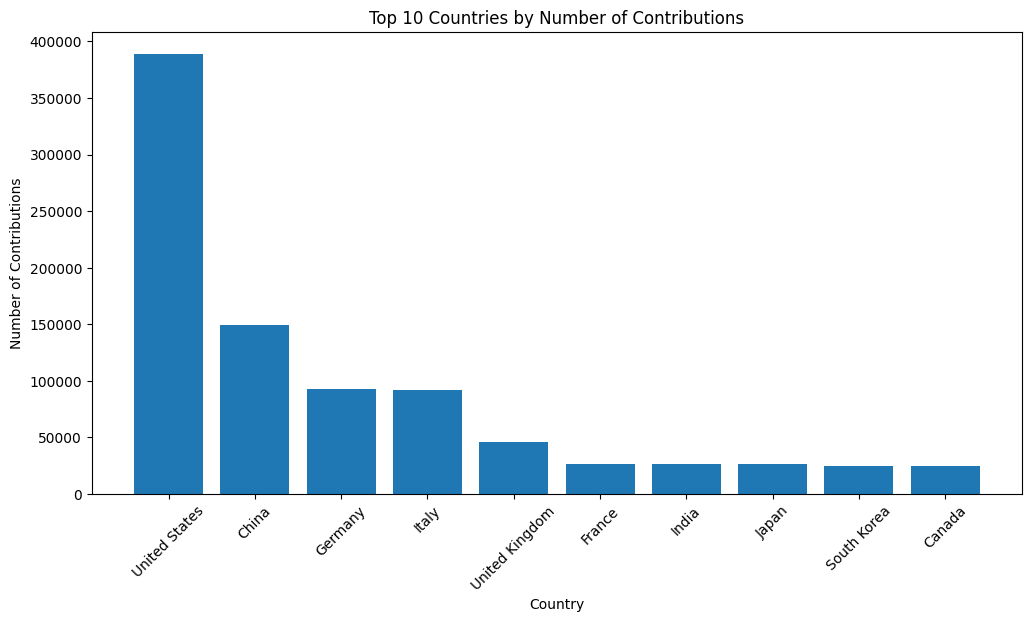

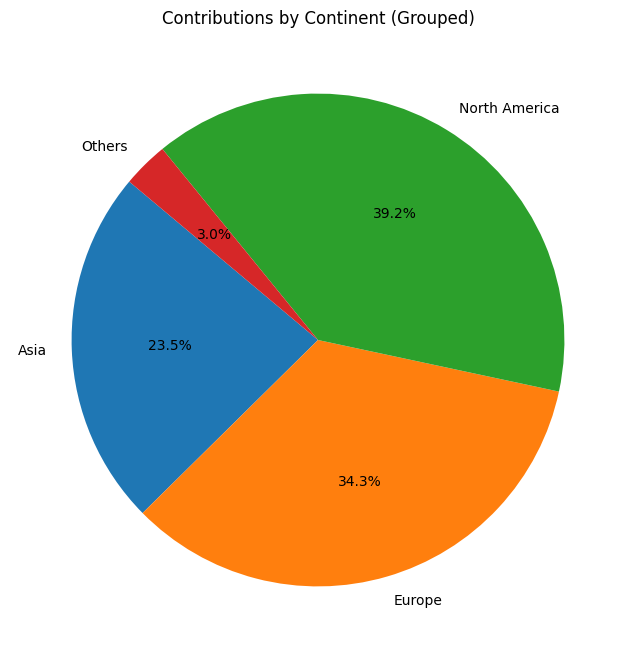

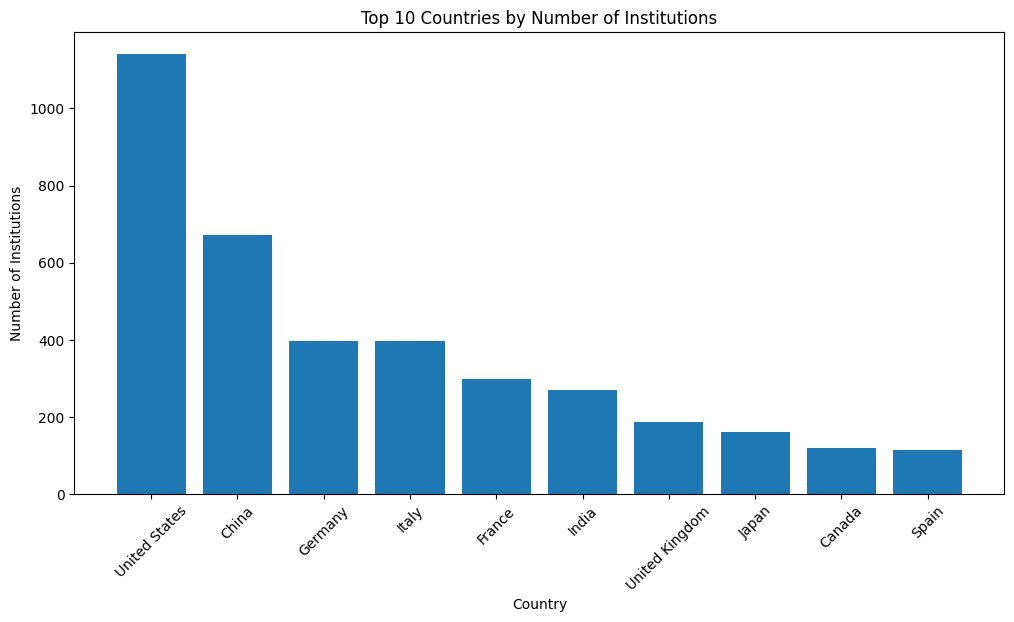

In [ ]:


# Bar chart for the top 10 countries by number of contributions
top_10_countries = dy.groupby('Country')['Count'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries.index, top_10_countries.values)
plt.title('Top 10 Countries by Number of Contributions')
plt.xlabel('Country')
plt.ylabel('Number of Contributions')
plt.xticks(rotation=45)
plt.show()

# Pie chart for number of contributions by continent, grouping those with < 5% as "Others"
continent_contribs = dy.groupby('Continent')['Count'].sum()
total_contribs = continent_contribs.sum()
continent_contribs = continent_contribs[continent_contribs >= 0.05 * total_contribs]
continent_contribs['Others'] = total_contribs - continent_contribs.sum()

plt.figure(figsize=(8, 8))
plt.pie(continent_contribs, labels=continent_contribs.index, autopct='%1.1f%%', startangle=140)
plt.title('Contributions by Continent')
plt.show()

# Displaying a bar chart for number of institutions by country
top_10_institutions = dy.groupby('Country')['Institution'].count().nlargest(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_institutions.index, top_10_institutions.values)
plt.title('Top 10 Countries by Number of Institutions')
plt.xlabel('Country')
plt.ylabel('Number of Institutions')
plt.xticks(rotation=45)
plt.show()



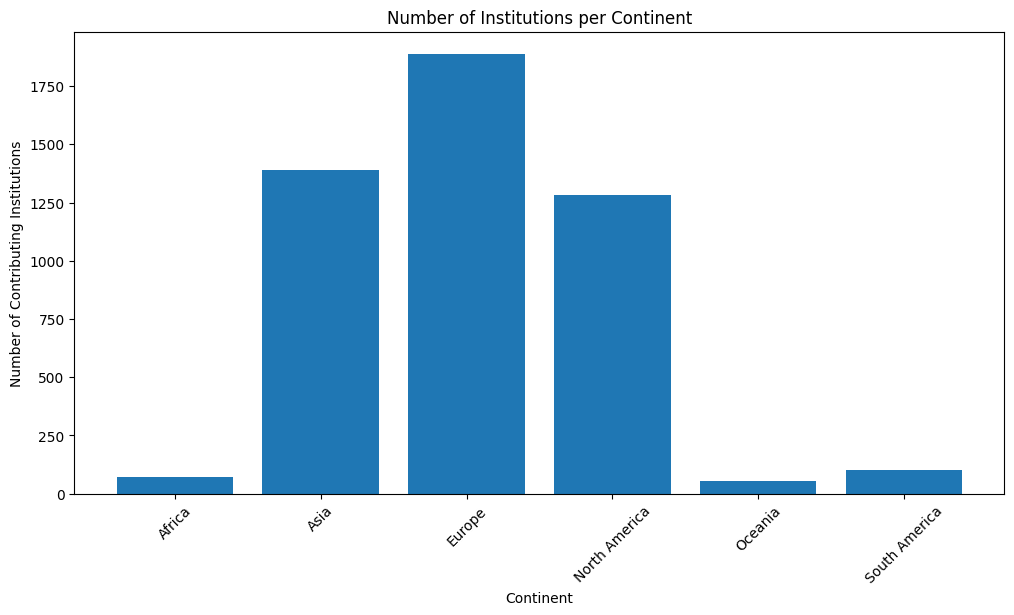

In [17]:
continent_institutions_full = dy.groupby('Continent')['Institution'].count()

plt.figure(figsize=(12, 6))
plt.bar(continent_institutions_full.index, continent_institutions_full.values)
plt.title('Number of Institutions per Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Contributing Institutions')
plt.xticks(rotation=45)
plt.show()